In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf

In [2]:
# Simulation of some data
np.random.seed (245)
nobs =10000

# Definition of normally distributed features
x1= np.random.normal(size=nobs ,scale=1) # x1 is normally distributed 
x2= np.random.normal(size=nobs ,scale=1) # x2 is normally distributed
x3= np.random.normal(size=nobs ,scale=1) # x3 is normally distributed
x4= np.random.normal(size=nobs ,scale=1) # x4 is normally distributed
x5= np.random.normal(size=nobs ,scale=1) # x5 is normally distributed

# Then features are transferred in a matrix 
X= np.c_[np.ones((nobs ,1)),x1,x2,x3,x4,x5] 


y= np.cos(x1) + np.sin(x2) + 2*x3 + x4 + 0.01*x5 + np.random.normal(size=nobs , scale=0.01) # fehler ist normalverteilt-> y auch ist normalverteilt
                                                                                            #  width irreducable error ist 0.01
    

# The Neural Network
### Hyper parameters


In [3]:
#Learningrate
LR=0.05


# Number of Neurons
Neuron_Out=1
Neuron_Hidden1=64
Neuron_Hidden2=32

#The Activation function
Activate_output='linear' # was sollte ich für letzte Schicht verwenden? lineare Transformation oder Softmax?
Activate_hidden='relu' # unterschied ist Hidden-Layer-Neuronen werden nicht linear transformiert


#The Optimizer
Optimizer= SGD(lr=LR)


# The loss function
loss='mean_squared_error'

# Splitting Data -> 85% Training und 15% Test
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size =0.15, random_state =77)


### Construct the Neural Network

In [4]:
## Neural Network
from tensorflow import set_random_seed
set_random_seed (245)

# For definition Jacobian Function
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

#Initialize the ANN
model_ANN= Sequential()

# Hidden Layer-> hidden layer is defined here -> The Number of neurons is 64, 32
# input is 6 neurons (1,x1,x2,x3,x4,x5)-> one is always the first column in input Matrix
model_ANN.add(Dense(Neuron_Hidden1, activation=Activate_hidden, input_shape=(6,), use_bias=True))
model_ANN.add(Dense(Neuron_Hidden2, activation=Activate_hidden, use_bias=True))

#Output Layer is defined here
model_ANN.add(Dense(Neuron_Out, activation=Activate_output,use_bias=True))
model_ANN.summary()

Instructions for updating:
Use `tf.global_variables_initializer` instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


### Compile the Neural Network

In [5]:
model_ANN.compile(optimizer=Optimizer , loss=loss)

### Fit the Neural Network

In [6]:
#Fit the model
history_ANN=model_ANN.fit(
x_train, # training data
y_train, # training targets
epochs=100)



Epoch 1/100
8500/8500 [==============================] - 3s 299us/step - loss: 0.1994
Epoch 2/100
8500/8500 [==============================] - 1s 71us/step - loss: 0.0504
Epoch 3/100
8500/8500 [==============================] - 1s 71us/step - loss: 0.0289
Epoch 4/100
8500/8500 [==============================] - 1s 71us/step - loss: 0.0229
Epoch 5/100
8500/8500 [==============================] - 1s 71us/step - loss: 0.0201
Epoch 6/100
8500/8500 [==============================] - 1s 71us/step - loss: 0.0117
Epoch 7/100
8500/8500 [==============================] - 1s 72us/step - loss: 0.0136
Epoch 8/100
8500/8500 [==============================] - 1s 71us/step - loss: 0.0092
Epoch 9/100
8500/8500 [==============================] - 1s 73us/step - loss: 0.0071
Epoch 10/100
8500/8500 [==============================] - 1s 72us/step - loss: 0.0072
Epoch 11/100
8500/8500 [==============================] - 1s 72us/step - loss: 0.0068
Epoch 12/100
8500/8500 [==============================] - 1s

8500/8500 [==============================] - 1s 72us/step - loss: 0.0015
Epoch 92/100
8500/8500 [==============================] - 1s 70us/step - loss: 0.0014
Epoch 93/100
8500/8500 [==============================] - 1s 71us/step - loss: 0.0015
Epoch 94/100
8500/8500 [==============================] - 1s 71us/step - loss: 0.0015
Epoch 95/100
8500/8500 [==============================] - 1s 70us/step - loss: 0.0015
Epoch 96/100
8500/8500 [==============================] - 1s 71us/step - loss: 0.0015
Epoch 97/100
8500/8500 [==============================] - 1s 70us/step - loss: 0.0017
Epoch 98/100
8500/8500 [==============================] - 1s 71us/step - loss: 0.0015
Epoch 99/100
8500/8500 [==============================] - 1s 72us/step - loss: 0.0013
Epoch 100/100
8500/8500 [==============================] - 1s 71us/step - loss: 0.0014


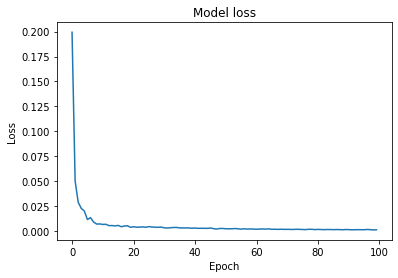

In [7]:
# Model Loss
plt.plot(history_ANN.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

### Evaluation

In [8]:
y_pred_ANN=model_ANN.predict(x_test) 
print("MSE ANN:", mean_squared_error(y_test, y_pred_ANN))

MSE ANN: 0.0012930890270461462


In [119]:
# y_pred_ANN.shape

(1500, 1)

# Find the Jacobian Matrix
### Inspired from "Computing the Jacobian matrix of a neural network in Python"

In [ ]:
def jacobian_tensorflow(x):    
    jacobian_matrix = []
    for m in range(len(y_pred_ANN)):    # What I should use here as an argument?
        # We iterate over the M elements of the output vector
        grad_func = tf.gradients(model_ANN.output[:, m], model_ANN.input)
        gradients = sess.run(grad_func, feed_dict={model_ANN.input: x.reshape((1, x.size))}) # The problem is x.reshape?
        jacobian_matrix.append(gradients[0][0,:])
        
    return np.array(jacobian_matrix)

In [164]:
jacobian_tensorflow(X)

ValueError: slice index 1 of dimension 1 out of bounds. for 'strided_slice_23' (op: 'StridedSlice') with input shapes: [?,1], [2], [2], [2] and with computed input tensors: input[1] = <0 1>, input[2] = <0 2>, input[3] = <1 1>.

In [169]:
#X.size

In [170]:
#np.reshape

In [171]:
#np.size(X,axis=0)

In [172]:
#rana=model_ANN.predict(X)
#rana.shape

# Find the jacobian Using Autograd

### Inspired from "Computing the Jacobian matrix of a neural network in Python"

In [165]:
def ffpass_tf(x):
    return model_ANN.predict(x) # not clear

In [168]:
rami=ffpass_tf(X)
rami.shape

(10000, 1)

In [136]:
# Compute Jacobian
from autograd import jacobian

def jacobian_autograd(x):
    return jacobian(ffpass_tf)(x) # not clear

In [137]:
jacobian_autograd(x_test)

ValueError: setting an array element with a sequence.

### Original Code as in Medium Story "Computing the Jacobian matrix of a neural network in Python"

In [84]:
def ffpass_tf(x):
    xr = x.reshape((1, x.size))
    return model_ANN.predict(xr)[0]

In [76]:
# Compute Jacobian
from autograd import jacobian

def jacobian_autograd(x):
    return jacobian(ffpass_tf)(x)

In [77]:
jacobian_autograd(x_test)

ValueError: setting an array element with a sequence.